In [24]:
# Import Libraries
import pandas as pd
import numpy as np

# Read Income Data
income_data = pd.read_csv("income_data.csv")

# Rename Income Data
income_data = income_data[['Community', 'median_household']]
income_data = income_data.rename(columns={'Community': 'Neighborhood', 'median_household': 'Median Income'})

# Remove commas and interpret as Float instead of String
income_data = income_data.replace(',','', regex=True)
income_data['Median Income'] = income_data['Median Income'].astype(float)

# Remove any neighborhood that have invalid data
income_data = income_data.dropna()
income_data['IncomeRank'] = income_data['Median Income'].rank(ascending=False)

# Sort data by rank
income_data = income_data.sort_values('IncomeRank')
income_data.head(20)

,Neighborhood,Median Income,IncomeRank
77,Fox Chapel,57362.0,1.0
167,Sewickley Heights,49439.0,2.0
194,Thornburg,45687.0,3.0
199,Upper St. Clair,39986.0,4.0
44,Churchill,36748.0,5.0
164,Rosslyn Farms,36347.0,6.0
27,Bradford Woods,34725.0,7.0
64,Edgeworth,33602.0,8.0
0,Aleppo,32944.0,9.0
78,Franklin Park,29714.0,10.0


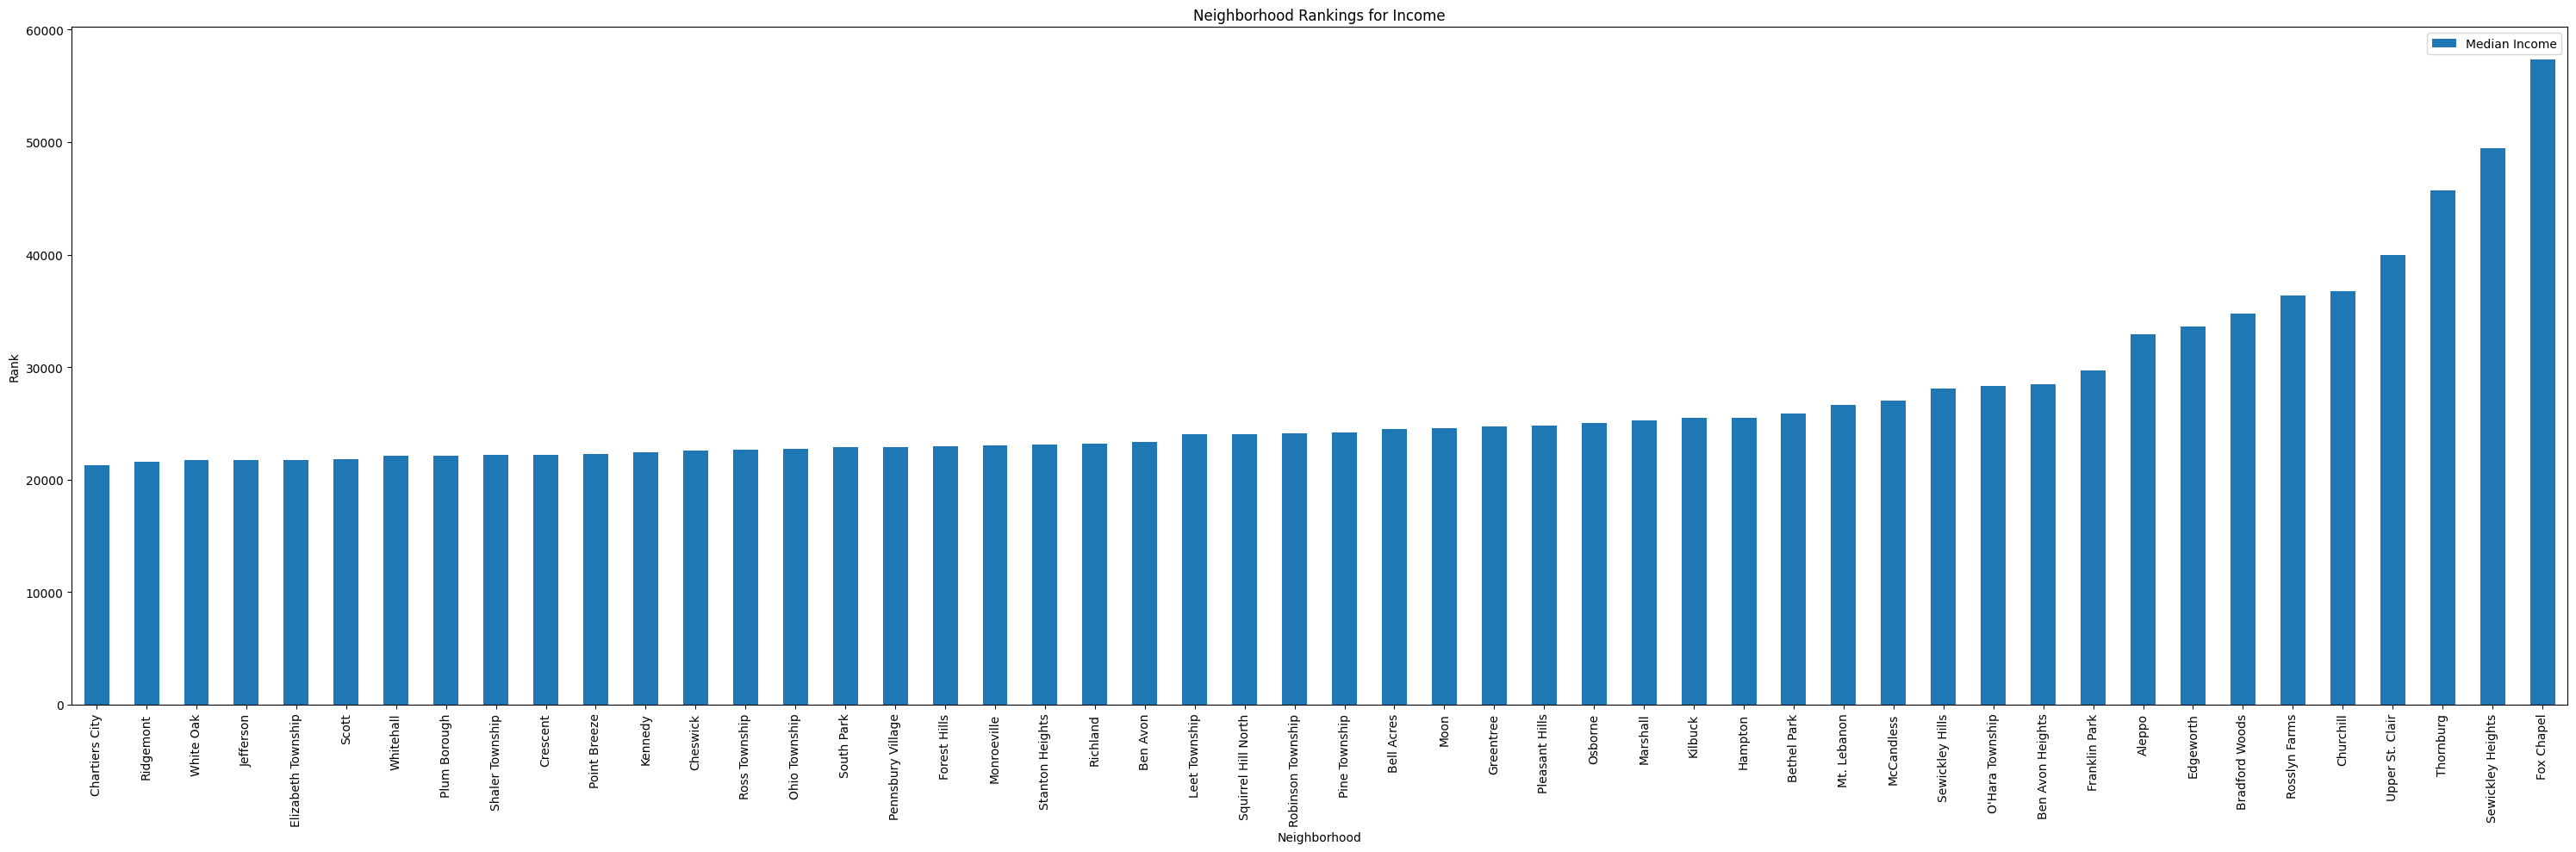

In [28]:
import matplotlib.pyplot as plt

# Limit to 100 entries
income_data = income_data.nlargest(100, 'Median Income')

# Use Median Income to Plot out Data
plot_data = income_data[['Neighborhood','Median Income']].set_index('Neighborhood')
plot_data = plot_data.sort_values('Median Income', ascending=True)

# Create the bar plot
fig, ax = plt.subplots(figsize=(30, 10))
plot_data[['Median Income']].plot(kind='bar', ax=ax)
ax.set_title("Neighborhood Rankings for Income")
ax.set_xlabel("Neighborhood")
ax.set_ylabel("Rank")

# Display the plot
plt.tight_layout()
plt.show()

# Conclusion
Best neighborhood: Fox Chapel

Overall, a high-income neighborhood often provides an ideal environment for raising a family due to a confluence of factors that contribute to a higher quality of life. Affluent neighborhoods typically boast well-funded schools, which can offer advanced educational opportunities and extracurricular activities, setting children up for future success. Additionally, these areas tend to have lower crime rates, ensuring a safer environment for families to reside and children to explore (but Nick will be looking at this data). The availability of diverse recreational options, such as parks, sports facilities, and cultural institutions, further enriches the family experience. Moreover, strong community engagement and well-maintained infrastructure in high-income neighborhoods create a supportive and stable atmosphere that fosters the healthy development of children and cultivates a sense of belonging for the entire family.

From the results, I expect at least one of the top 20 neighborhoods in income to be in the final "best neighborhoods." But I also don't expect the wealthiest neighborhood, Fox Chapel to necessarily be there since it could be the case that wealthy neighborhoods only care about themselves and don't contribute to community areas. That's why we care also about parks (Avneet's data). Furthermore, wealthy areas could have lots of crime, which is why Nick's data is important.